In [1]:
# Import required modules 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np

### Exploring the important features for performance

In [2]:
# Load the dataset
df = pd.read_csv("traffic_features.csv")
X = df.drop(columns=["label"])
y = df["label"]

C:\Users\Donia\AppData\Local\Temp\ipykernel_77484\2929371940.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")


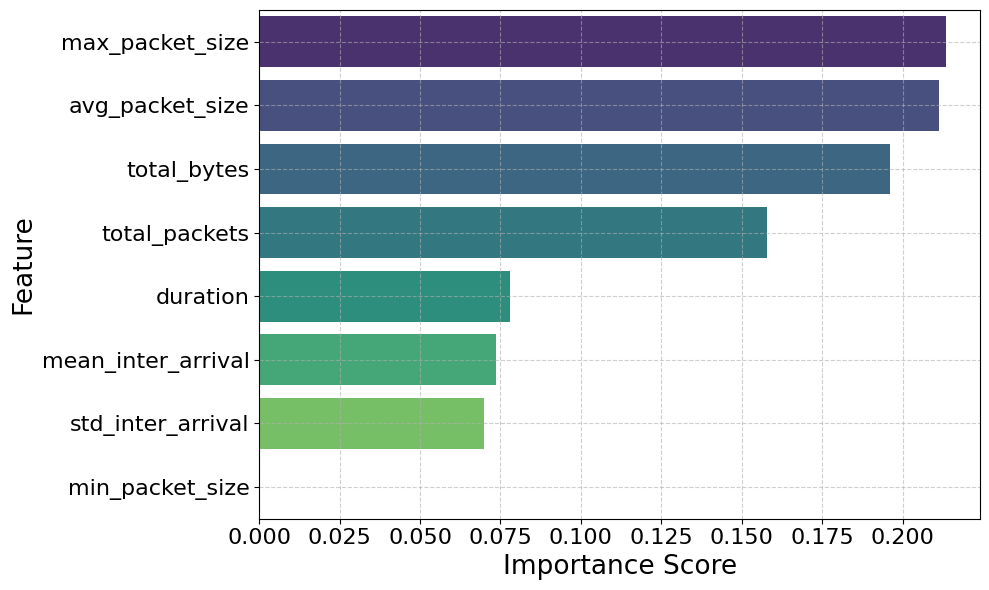

In [6]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")
plt.xlabel("Importance Score",fontsize=19)
plt.ylabel("Feature",fontsize=19)

# Make tick labels bigger
plt.tick_params(axis='both', labelsize=16)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("plots/feature_importance.png")
plt.show()


### Adding Noise to the important features, to see how that influences model performance

In [4]:
OUTPUT_NOISY_CSV = "traffic_features_noisy.csv"

# Define noise injection for each top feature
np.random.seed(42)  # For reproducibility

df["max_packet_size"] += df["max_packet_size"] * np.random.normal(loc=0.2, scale=0.1, size=len(df))
df["avg_packet_size"] += df["avg_packet_size"] * np.random.normal(loc=0.15, scale=0.05, size=len(df))
df["total_bytes"] += df["total_bytes"] * np.random.normal(loc=0.25, scale=0.1, size=len(df))
df["total_packets"] += np.abs(np.random.normal(loc=5, scale=2, size=len(df)))

# Ensure no negative values
for col in ["max_packet_size", "avg_packet_size", "total_bytes", "total_packets"]:
    df[col] = df[col].clip(lower=0)

# Save new noisy version
df.to_csv(OUTPUT_NOISY_CSV, index=False)
print(f"[INFO] Noisy dataset saved to {OUTPUT_NOISY_CSV}")

[INFO] Noisy dataset saved to traffic_features_noisy.csv
